### Andrew Ingrassia
### Task 4.10
### Part 1
***

### Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
import os

In [2]:
# Defines a file path for sake of convenience

path = r"C:\Users\ingra\OneDrive\Desktop\Career Foundry\(2) Data Analytics Immersion\Data Immersion - Section 4\Instacart Basket Analysis"

In [3]:
# Imports the 'instacart_df' dataframe and stores it in the variable 'df'

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_df.pkl'))

In [4]:
# Sets the maximum number of columns to display to 'None' (no limit)

pd.set_option('display.max_columns', None)

***

### Table of Contents

#### 1. Address any PII data in the dataframe before continuing your analysis
#### 2. Determine whether there’s a difference in spending habits between the different U.S. regions
#### 3. Create an exclusion flag for low-activity customers (less than 5 orders) and exclude them from the data
#### 4. Create a profiling variable based on age
#### 5. Create a profiling variable based on income
#### 6. Create a profiling variable based on certain goods from the 'department_id' column
#### 7. Create a profiling variable based on number of dependents
#### 8. Calculate the max, mean, and min values for usage frequency and expenditure for each customer profile
#### 9. Identify any links between (a) customer profiles, (b) regions, & (c) departments
#### 10. Misc. visualizations for final report

***
### 1. Address any PII data in the dataframe before continuing your analysis

In [5]:
# Views column names - looking for sensitive information

df.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_category,median_order_frequency,order_frequency,first_name,last_name,gender,state,age,date_joined,num_dependents,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Moderately busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
# Removes customer first and last names
# Also removes the '_merge' column (less RAM usage)

del df['first_name']
del df['last_name']
del df['_merge']

- No other PII concerns are present in the dataframe

In [7]:
# Views the changes

df.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_category,median_order_frequency,order_frequency,gender,state,age,date_joined,num_dependents,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Moderately busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


### 2. Determine whether there’s a difference in spending habits between the different U.S. regions

In [8]:
# Creates an empty list to contain the regions under which each state falls
# Contents will eventually make up the 'region' column in the 'df' dataframe

region = []

In [9]:
# Uses the contents of the 'state' to populate the 'region' list

for value in df['state']:
    if value in [
                'Maine',
                'New Hampshire',
                'Vermont',
                'Massachusetts',
                'Rhode Island',
                'Connecticut',
                'New York',
                'Pennsylvania',
                'New Jersey']:
        region.append('Northeast')
    elif value in [
                'Wisconsin',
                'Michigan',
                'Illinois',
                'Indiana',
                'Ohio',
                'North Dakota',
                'South Dakota',
                'Nebraska',
                'Kansas',
                'Minnesota',
                'Iowa',
                'Missouri']:
        region.append('Midwest')
    elif value in [
                'Delaware',
                'Maryland',
                'District of Columbia',
                'Virginia',
                'West Virginia',
                'North Carolina',
                'South Carolina',
                'Georgia',
                'Florida',
                'Kentucky',
                'Tennessee',
                'Mississippi',
                'Alabama',
                'Oklahoma',
                'Texas',
                'Arkansas',
                'Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [10]:
# Creates a 'region' column within the 'df' dataframe and populates it with the contents of 
# the 'region' list

df['region'] = region

In [11]:
# Ensures the presence of the new column and counts the associated values

df['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [12]:
# Checks the data type of the contents of the 'region' column

df['region'].dtypes

dtype('O')

In [13]:
# Creates a crosstab between the 'region' and 'spending_category' 

regional_spending_categories = pd.crosstab(df['region'], df['spending_category'], dropna = False)

In [14]:
# Views the resulting crosstab

regional_spending_categories

spending_category,High spender,Low spender
region,,
Midwest,155932,7441350
Northeast,108180,5614511
South,209481,10582194
West,160271,8132559


- Regional differences in spending habits appear to exist when all of a region's states are looked at in aggregate

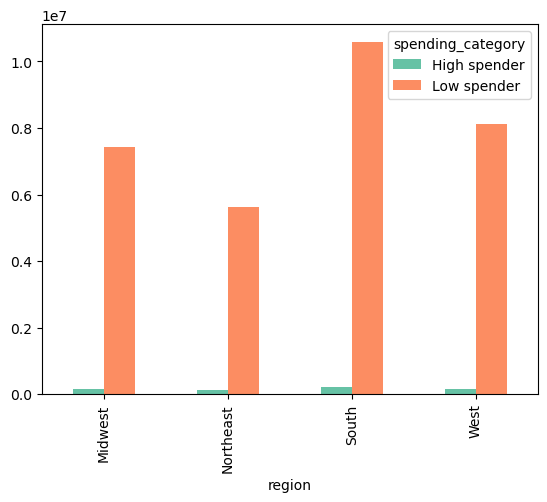

In [15]:
# Creates a bar chart related to regional spending categories

spending_category_bar = regional_spending_categories.plot.bar(color = sns.color_palette('Set2'))

### 3.  Create an exclusion flag for low-activity customers (less than 5 orders) and exclude them from the data

In [16]:
# Create a flag ('customer_activity') that indicates whether a customer has more or less than 5 orders (High vs Low)

df.loc[df['max_order'] >= 5, 'customer_activity'] = 'High'
df.loc[df['max_order'] < 5,'customer_activity'] = 'Low'

In [17]:
# Views the two categories

df['customer_activity'].value_counts(dropna = False)

High    30964564
Low      1440295
Name: customer_activity, dtype: int64

In [18]:
# Create a separate dataframe ('df_high) that excludes all low activity customers

df_high = df[df['customer_activity'] == 'High']

In [19]:
# Exports the 'df_high' dataframe as a pickle

df_high.to_pickle(os.path.join(path,'02 Data','Prepared Data','instacart_df_high_activity_customers.pkl'))

### 4. Create a profiling variable based on age

In [20]:
# Creates flag that indicates whether a customer can be categorized as 'young', 'middle-age', or 'senior' based on age

df.loc[df['age'] >= 35, 'age_category'] = 'Middle-Age'
df.loc[df['age'] < 35,'age_category'] = 'Young'
df.loc[df['age'] >= 62,'age_category'] = 'Senior'

In [21]:
# Views 'age_category' value counts

df['age_category'].value_counts(dropna = False)

Middle-Age    13682265
Senior        10094939
Young          8627655
Name: age_category, dtype: int64

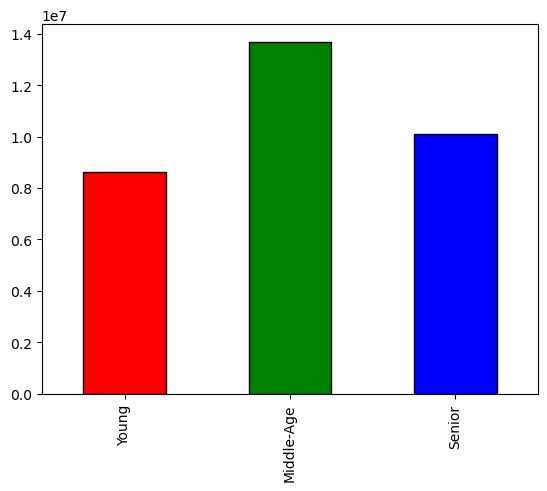

In [22]:
# Creates a list of 'age_category' variables in the order I want them to show up in the bar chart
# Creates a bar chart from the 'age_category' column and assigns the result to the variable 'age_category_bar'

desired_order = ['Young', 'Middle-Age', 'Senior']
age_category_bar = df['age_category'].value_counts().loc[desired_order].plot.bar(color = ['red', 'green', 'blue'], edgecolor = 'black')

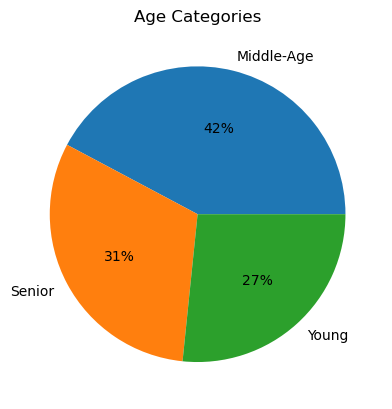

In [23]:
# Presents the same information in the form of a pie chart

age_category_pie = df['age_category'].value_counts().plot.pie(title = 'Age Categories', label = '', autopct=('%1.f%%'))

In [24]:
# Exports the visualization

age_category_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_category_bar.png'))

In [25]:
# Creates a crosstabe between 'spending_category' and 'age_category'

age_spending_crosstab = pd.crosstab(df['age_category'], df['spending_category'], dropna = False)

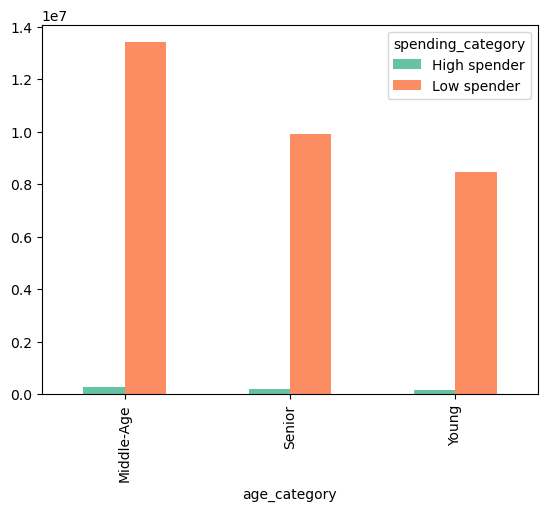

In [26]:
# Creates a bar chart to show any relationship between age category and spending category

age_spending_bar = age_spending_crosstab.plot.bar(color = sns.color_palette('Set2'))

### 5. Create a profiling variable based on income

In [27]:
# Creates flag that indicates whether a customer can be categorized as 'low-income', 'mid-income', or 'high-income'

df.loc[df['income'] < 35000, 'income_category'] = 'Low-Income'
df.loc[(df['income'] >= 35000) & (df['income'] <= 100000), 'income_category'] = 'Mid-Income'
df.loc[df['income'] > 100000, 'income_category'] = 'High-Income'

In [28]:
# Views the contents of the 'income_category' column

df['income_category'].value_counts()

Mid-Income     16629945
High-Income    14814202
Low-Income       960712
Name: income_category, dtype: int64

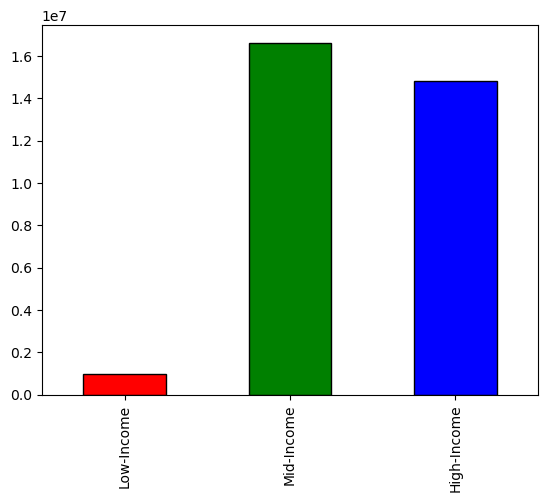

In [29]:
# Creates a list of 'income_category' variables in the order I want them to show up in the bar chart
# Creates a bar chart from the 'income_category' column and assigns the result to the variable 'income_category_bar'

desired_order_2 = ['Low-Income', 'Mid-Income', 'High-Income']
income_category_bar = df['income_category'].value_counts().loc[desired_order_2].plot.bar(color = ['red', 'green', 'blue'], edgecolor = 'black')

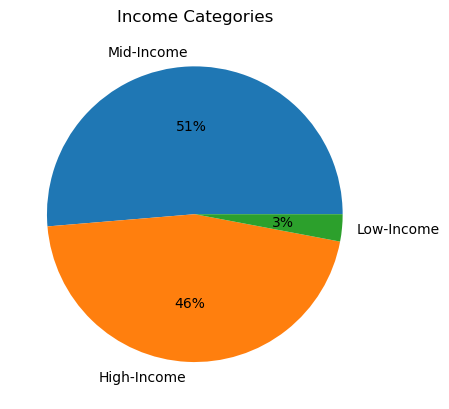

In [30]:
# Presents the same information in the form of a pie chart

income_category_pie = df['income_category'].value_counts().plot.pie(title = 'Income Categories', label = '', autopct=('%1.f%%'))

In [31]:
# Exports the visualization

income_category_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_category_bar.png'))

### 6. Create a profiling variable based on certain goods from the 'department_id' column

In [32]:
# Imports the dataframe containing the names of departments and assigns it to the variable 'dep_names'

dep_names = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [33]:
# Views the 'dep_names' dataframe

dep_names

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


##### Sale of goods by age category: 'Young'

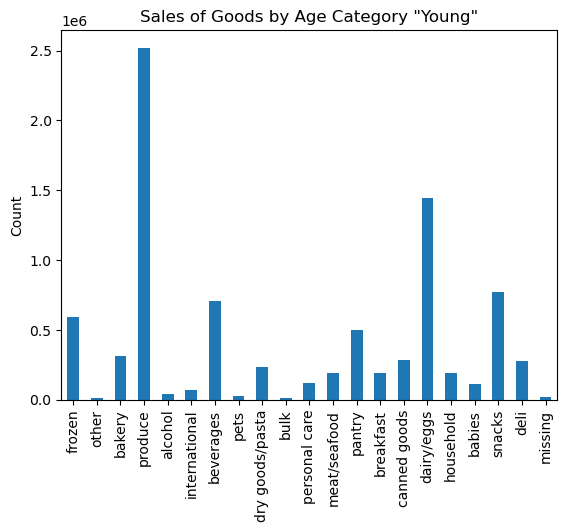

In [70]:
# Create a dictionary to map department IDs to names
department_names = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods/pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat/seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy/eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'}

# Create the cross-tabulation
age_department_crosstab_1 = pd.crosstab(df['age_category'] == 'Young', df['department_id'], dropna=False)

# Filter the cross-tabulation for 'Young' age category
age_department_crosstab_young = age_department_crosstab_1.loc[True]

# Plot the bar chart and assign it to ax
ax = age_department_crosstab_young.plot.bar()

plt.xlabel('')
plt.ylabel('Count')
plt.title('Sales of Goods by Age Category "Young"')
plt.legend().remove()

# Set the x-tick labels using the department names
ax.set_xticklabels([department_names.get(id, '') for id in age_department_crosstab_young.index], rotation='vertical')

plt.show()

##### Sale of goods by age category: 'Middle-Age'

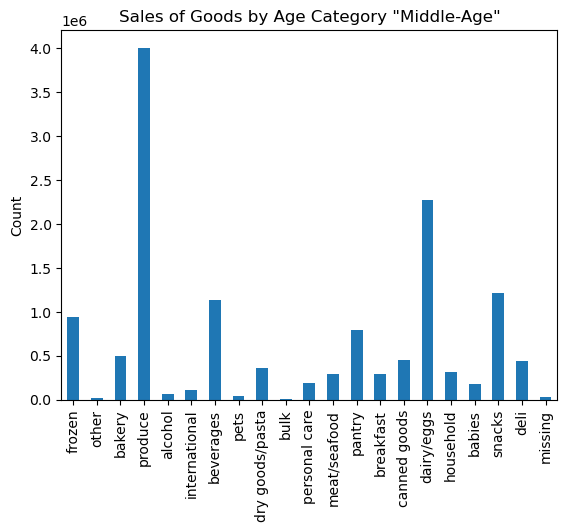

In [71]:
# Create a dictionary to map department IDs to names
department_names = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods/pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat/seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy/eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'}

# Create the cross-tabulation
age_department_crosstab_2 = pd.crosstab(df['age_category'] == 'Middle-Age', df['department_id'], dropna=False)

# Filter the cross-tabulation for 'Young' age category
age_department_crosstab_middle_age = age_department_crosstab_2.loc[True]

# Plot the bar chart and assign it to ax
ax = age_department_crosstab_middle_age.plot.bar()

plt.xlabel('')
plt.ylabel('Count')
plt.title('Sales of Goods by Age Category "Middle-Age"')
plt.legend().remove()

# Set the x-tick labels using the department names
ax.set_xticklabels([department_names.get(id, '') for id in age_department_crosstab_middle_age.index], rotation='vertical')

plt.show()

##### Sale of goods by age category: 'Senior'

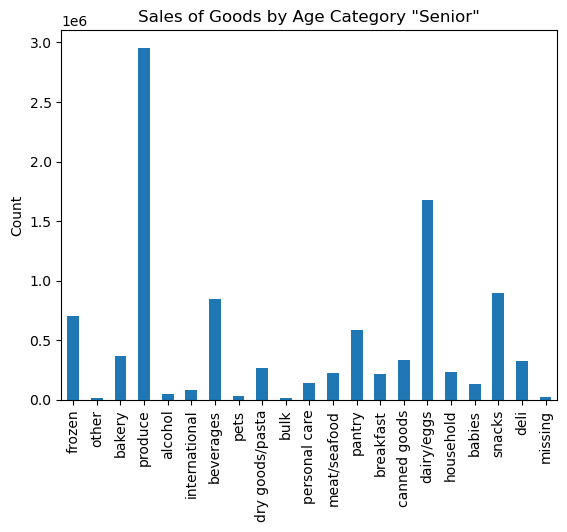

In [72]:
# Create a dictionary to map department IDs to names
department_names = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods/pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat/seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy/eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'}

# Create the cross-tabulation
age_department_crosstab_3 = pd.crosstab(df['age_category'] == 'Senior', df['department_id'], dropna=False)

# Filter the cross-tabulation for 'Young' age category
age_department_crosstab_senior = age_department_crosstab_3.loc[True]

# Plot the bar chart and assign it to ax
ax = age_department_crosstab_senior.plot.bar()

plt.xlabel('')
plt.ylabel('Count')
plt.title('Sales of Goods by Age Category "Senior"')
plt.legend().remove()

# Set the x-tick labels using the department names
ax.set_xticklabels([department_names.get(id, '') for id in age_department_crosstab_senior.index], rotation='vertical')

plt.show()

In [36]:
# Renames the 'Unnamed: 0' column to 'department_id'

dep_names.rename(columns = {'Unnamed: 0':'department_id'}, inplace=True)

In [37]:
# Views the renamed column

dep_names.head(1)

,department_id,department
0,1,frozen


In [38]:
# Viewing the frequency with which items from each department are purchased

df['department_id'].value_counts()

4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

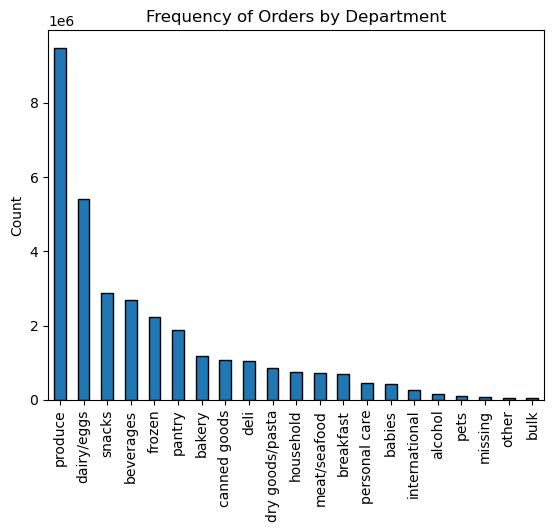

In [39]:
# Create a dictionary to map department IDs to names
department_names = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods/pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat/seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy/eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'}

# Creates a bar chart of the value counts associated with the 'department_id' column
dep_bar = df['department_id'].value_counts().plot.bar(edgecolor='black')

plt.xlabel('')
plt.ylabel('Count')
plt.title('Frequency of Orders by Department')

# Get the current axes object
ax = dep_bar.axes

# Set the x-tick labels using the department names
ax.set_xticklabels([department_names.get(id, '') for id in df['department_id'].value_counts().index], rotation='vertical')

plt.show()

**The following named departments have sold the greatest number of products:**

    - Produce (9479291)
    - Dairy/Eggs (5398747)
    - Snacks (2887550)

**The following named departments have sold the fewest products:**

    - Alcohol (153696)
    - Pets (97716)
    - Bulk (34573)

In [40]:
# Exports the visualization

dep_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dep_bar.png'))

### 7. Create a profiling variable based on number of dependents

In [41]:
# Determines the range within the 'dependent_num' variable (0-3)

df['num_dependents'].value_counts()

3    8135109
0    8097503
2    8091143
1    8081104
Name: num_dependents, dtype: int64

In [42]:
# Creates a flag that indicates whether or not the customer has any dependents

df.loc[df['num_dependents'] ==0, 'dependent_status'] = 'No'
df.loc[df['num_dependents'] !=0, 'dependent_status'] = 'Yes'

In [43]:
# Views the new column's value counts

df['dependent_status'].value_counts()

Yes    24307356
No      8097503
Name: dependent_status, dtype: int64

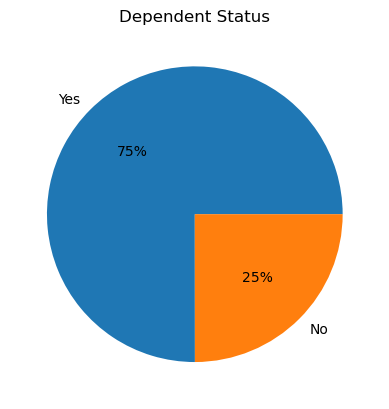

In [44]:
# Creates a pie chart that shows the breakdown of customer dependent status

dependent_pie = df['dependent_status'].value_counts().plot.pie(title = 'Dependent Status', label = '', autopct=('%1.f%%'))

In [45]:
# Exports the visualization

dependent_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dependent_pie.png'))

In [46]:
# Creates a crosstab between dependent_status and spending_category

dependent_spending_crosstab = pd.crosstab(df['dependent_status'], df['spending_category'], dropna = False)

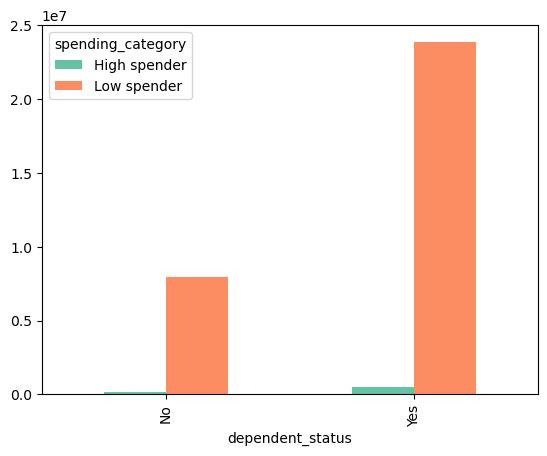

In [47]:
# Creates a bar chart to show any relationship between age category and spending category

dependent_spending_bar = dependent_spending_crosstab.plot.bar(color = sns.color_palette('Set2'))

### 8. Calculate the max, mean, and min values for usage frequency and expenditure for each customer profile

In [48]:
# Age category statistics

df.groupby('age_category').agg({'days_since_prior_order':['min', 'max', 'mean']})

days_since_prior_order                 
                                min   max       mean
age_category                                        
Middle-Age                      0.0  30.0  11.108569
Senior                          0.0  30.0  11.083744
Young                           0.0  30.0  11.120752

In [49]:
# Income category statistics

df.groupby('income_category').agg({'days_since_prior_order':['max', 'mean', 'min']})

days_since_prior_order                
                                   max       mean  min
income_category                                       
High-Income                       30.0  11.039865  0.0
Low-Income                        30.0  11.756872  0.0
Mid-Income                        30.0  11.124078  0.0

In [50]:
# Dependent status statistics

df.groupby(['dependent_status']).agg({'days_since_prior_order':['max','mean', 'min']})

days_since_prior_order                
                                    max       mean  min
dependent_status                                       
No                                 30.0  11.080806  0.0
Yes                                30.0  11.111834  0.0

### 9. Identify any links between (a) customer profiles, (b) regions, & (c) departments

##### Income Category by Region

In [51]:
# Creates a crosstab between the 'income_category' and 'region' columns
income_region_ct = pd.crosstab(df['region'], df['income_category'], dropna = False)

# Check the type of 'income_region_ct'
print(type(income_region_ct))

<class 'pandas.core.frame.DataFrame'>


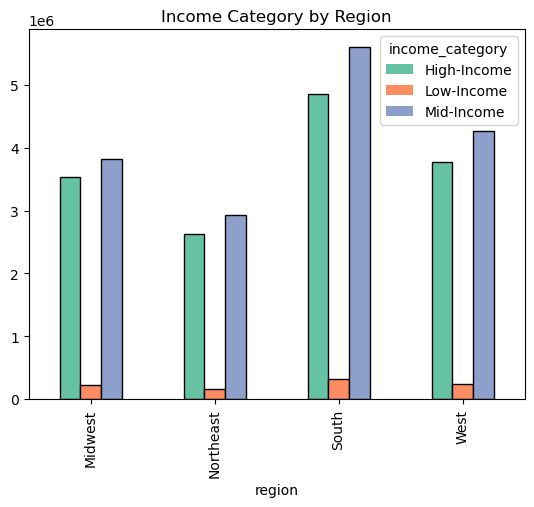

In [52]:
# Creates a bar chart with data from the 'income_region_ct' crosstab
income_region_bar = income_region_ct.plot.bar(color = sns.color_palette('Set2'))

# Sets the title
plt.title('Income Category by Region')

# Add black edgecolor to the bars
for patch in income_region_bar.patches:
    patch.set_edgecolor('black')

# Shows the plot
plt.show()

- Distribution of income categories appears to be relatively consistent among regions

In [53]:
# Exports the visualization

income_region_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_region_bar.png'))

##### Age Category by Region

In [54]:
# Creates a crosstab between the 'age_category' and 'region' columns
age_region_ct = pd.crosstab(df['region'], df['age_category'], dropna = False)

# Check the type of 'age_region_ct'
print(type(age_region_ct))

<class 'pandas.core.frame.DataFrame'>


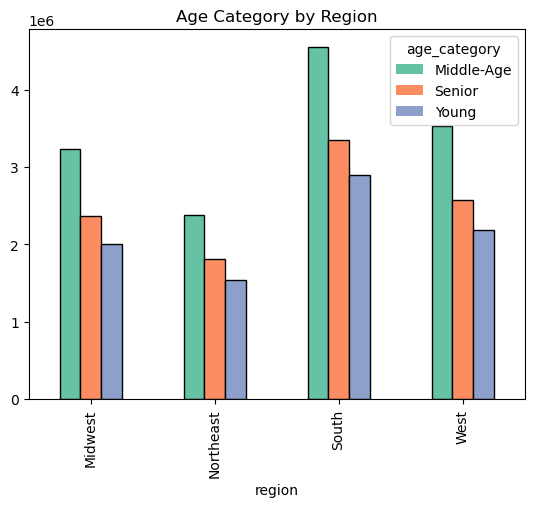

In [55]:
# Creates a bar chart with data from the 'age_region_ct' crosstab
age_region_bar = age_region_ct.plot.bar(color = sns.color_palette('Set2'))

# Sets the title
plt.title('Age Category by Region')

# Add black edgecolor to the bars
for patch in age_region_bar.patches:
    patch.set_edgecolor('black')

# Shows the plot
plt.show()

- Distribution of age categories appears to be relatively consistent among regions

In [56]:
# Exports the visualization

age_region_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_region_bar.png'))

##### Dependent Status by Region

In [57]:
# Creates a crosstab between the 'dependent_status' and 'region' columns
ds_region_ct = pd.crosstab(df['region'], df['dependent_status'], dropna = False)

# Check the type of 'age_region_ct'
print(type(ds_region_ct))

<class 'pandas.core.frame.DataFrame'>


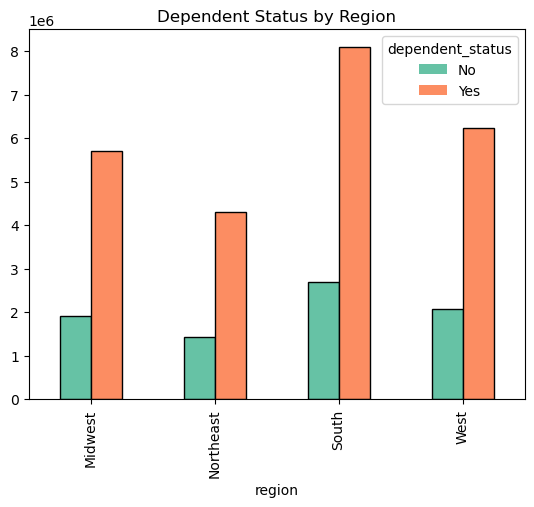

In [58]:
# Creates a bar chart with data from the 'ds_region_ct' crosstab
ds_region_bar = ds_region_ct.plot.bar(color = sns.color_palette('Set2'))

# Sets the title
plt.title('Dependent Status by Region')

# Add black edgecolor to the bars
for patch in ds_region_bar.patches:
    patch.set_edgecolor('black')

# Shows the plot
plt.show()

- Dependent status distribution appears to be relatively consistent among regions

In [59]:
# Exports the visualization

ds_region_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','ds_region_bar.png'))

##### Sales by family status charts

In [60]:
# Create a dictionary to map department IDs to names
department_names = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods/pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat/seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy/eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'}

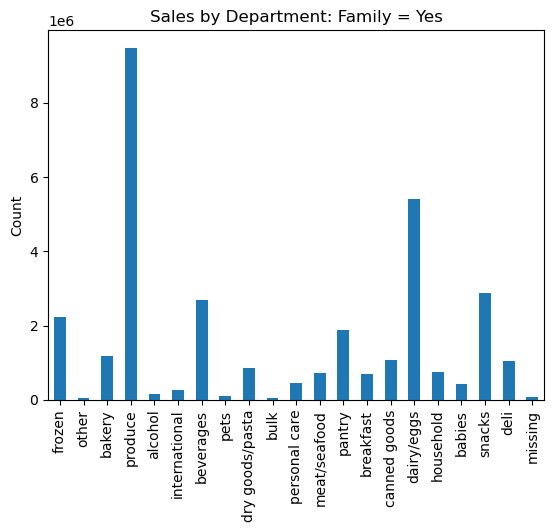

In [61]:
# Create the cross-tabulation
dependent_department_crosstab_1 = pd.crosstab(df['department_id'], df['dependent_status'] == 'yes', dropna=False)

# Plot the bar chart
ax = dependent_department_crosstab_1.plot.bar()

plt.xlabel('')
plt.ylabel('Count')
plt.title('Sales by Department: Family = Yes')
plt.legend().remove()

# Set the x-tick labels using the department names
ax.set_xticklabels([department_names.get(id, '') for id in dependent_department_crosstab_1.index], rotation='vertical')

plt.show()

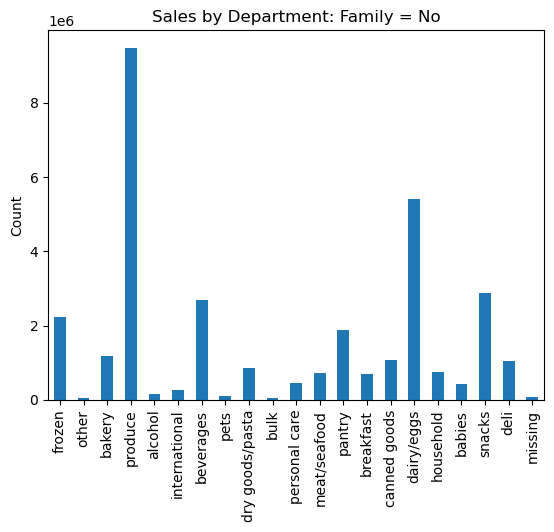

In [62]:
# Create the cross-tabulation
dependent_department_crosstab_2 = pd.crosstab(df['department_id'], df['dependent_status'] == 'no', dropna=False)

# Plot the bar chart
ax = dependent_department_crosstab_1.plot.bar()

plt.xlabel('')
plt.ylabel('Count')
plt.title('Sales by Department: Family = No')
plt.legend().remove()

# Set the x-tick labels using the department names
ax.set_xticklabels([department_names.get(id, '') for id in dependent_department_crosstab_2.index], rotation='vertical')

plt.show()

##### Sales by region charts

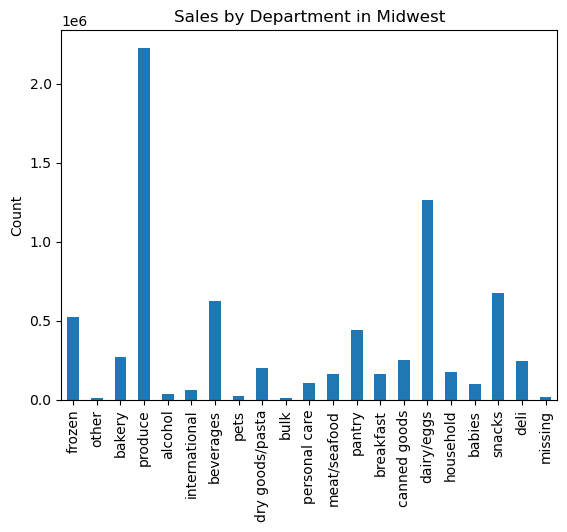

In [63]:
# Create the cross-tabulation
region_department_crosstab = pd.crosstab(df['department_id'], df['region'] == 'Midwest')

# Filter the cross-tabulation for Midwest region
region_department_crosstab_midwest = region_department_crosstab.loc[:, True]

# Plot the bar chart and assign it to ax
ax = region_department_crosstab_midwest.plot.bar()

plt.xlabel('')
plt.ylabel('Count')
plt.title('Sales by Department in Midwest')
plt.legend().remove()

# Set the x-tick labels using the department names
ax.set_xticklabels([department_names.get(id, '') for id in region_department_crosstab.index], rotation='vertical')

plt.show()

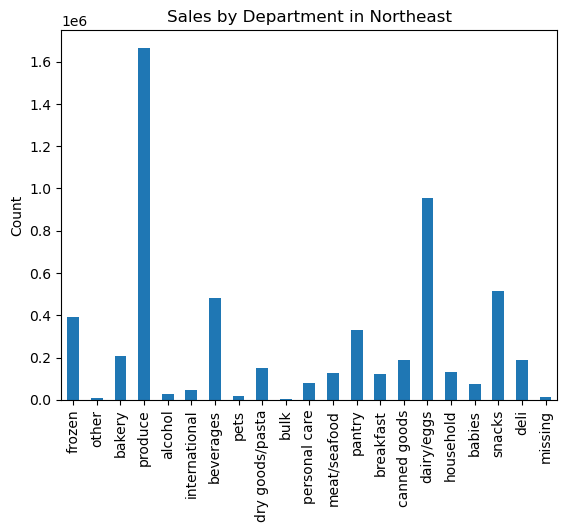

In [64]:
# Create the cross-tabulation
region_department_crosstab_2 = pd.crosstab(df['department_id'], df['region'] == 'Northeast')

# Filter the cross-tabulation for Northeast region
region_department_crosstab_northeast = region_department_crosstab_2.loc[:, True]

# Plot the bar chart
ax = region_department_crosstab_northeast.plot.bar()

plt.xlabel('')
plt.ylabel('Count')
plt.title('Sales by Department in Northeast')
plt.legend().remove()

# Set the x-tick labels using the department names
ax.set_xticklabels([department_names.get(id, '') for id in region_department_crosstab_2.index], rotation='vertical')

plt.show()

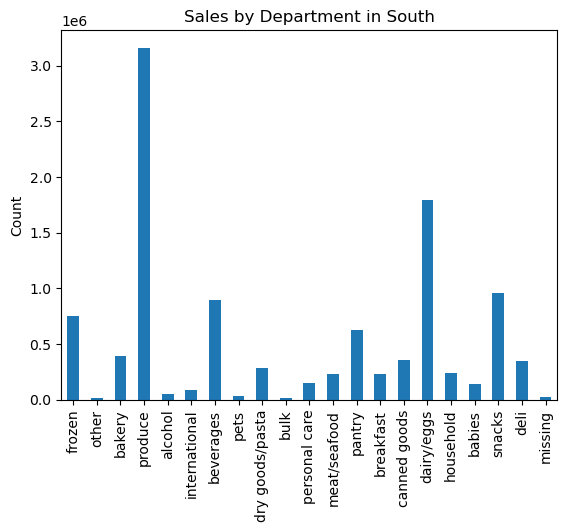

In [65]:
# Create the cross-tabulation
region_department_crosstab_3 = pd.crosstab(df['department_id'], df['region'] == 'South')

# Filter the cross-tabulation for South region
region_department_crosstab_south = region_department_crosstab_3.loc[:, True]

# Plot the bar chart
ax = region_department_crosstab_south.plot.bar()

plt.xlabel('')
plt.ylabel('Count')
plt.title('Sales by Department in South')
plt.legend().remove()

# Set the x-tick labels using the department names
ax.set_xticklabels([department_names.get(id, '') for id in region_department_crosstab_3.index], rotation='vertical')

plt.show()

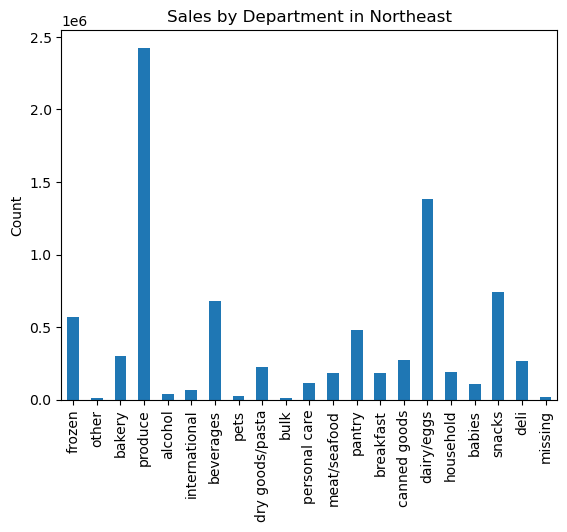

In [66]:
# Create the cross-tabulation
region_department_crosstab_4 = pd.crosstab(df['department_id'], df['region'] == 'West')

# Filter the cross-tabulation for West region
region_department_crosstab_west = region_department_crosstab_4.loc[:, True]

# Plot the bar chart
ax = region_department_crosstab_west.plot.bar()

plt.xlabel('')
plt.ylabel('Count')
plt.title('Sales by Department in Northeast')
plt.legend().remove()

# Set the x-tick labels using the department names
ax.set_xticklabels([department_names.get(id, '') for id in region_department_crosstab_4.index], rotation='vertical')

plt.show()

##### Customer categories by brand loyalty

In [79]:
df.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_category,median_order_frequency,order_frequency,gender,state,age,date_joined,num_dependents,fam_status,income,region,customer_activity,age_category,income_category,dependent_status
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Moderately busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High,Young,Mid-Income,Yes


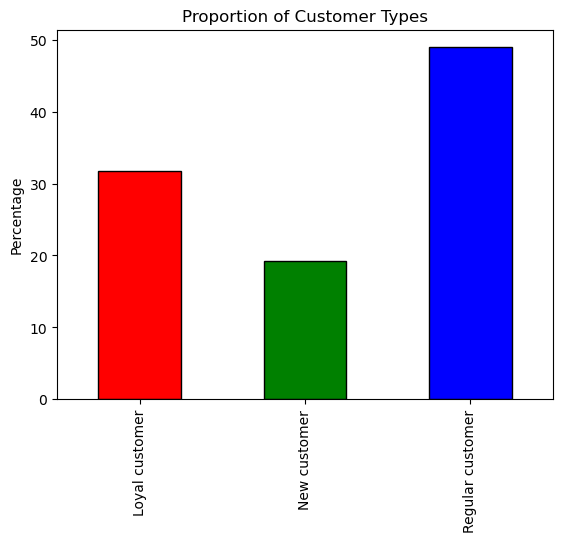

In [84]:
# Calculate the percentage of loyalty flags
loyalty_flag_counts = df['loyalty_flag'].value_counts(normalize=True) * 100

# Plot the bar chart
bar = loyalty_flag_counts.sort_index().plot.bar(color=['red', 'green', 'blue'], edgecolor='black')

plt.xlabel('')
plt.ylabel('Percentage')
plt.title('Proportion of Customer Types')

plt.show()